In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# import re

In [0]:
# comments['new'] = df['comment_text'].map(lambda x: re.sub(r'!', '', x))

In [0]:
# comments.head()

In [6]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
  print(f'GPU found at:{device_name}')
else:
  raise SystemError('GPU device not found')


GPU found at:/device:GPU:0


In [7]:
import torch

if torch.cuda.is_available():
  device=torch.device("cuda")
  print("there are %d GPU(s) avialable" % torch.cuda.device_count())
  print("We will be using GPU: ", torch.cuda.get_device_name(0))
else:
  print('No GOPU available, using the CPU instead')
  device=torch.device('cpu')

there are 1 GPU(s) avialable
We will be using GPU:  Tesla P4


In [8]:
# Installing Hugginf face library
!pip install transformers

     |████████████████████████████████| 645kB 12.9MB/s 
     |████████████████████████████████| 890kB 51.3MB/s 
     |████████████████████████████████| 3.8MB 51.0MB/s 
     |████████████████████████████████| 1.1MB 45.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=366dab3a4febcd693dffd6dab1d65fe34a6cbdbaff333dfcc2305f8cc509e966
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
comments_train=pd.read_csv('gdrive/My Drive/JIGSAW/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv', skipinitialspace=True)
comments_test=pd.read_csv('gdrive/My Drive/JIGSAW/jigsaw-multilingual-toxic-comment-classification/test.csv')
comments_validation=pd.read_csv('gdrive/My Drive/JIGSAW/jigsaw-multilingual-toxic-comment-classification/validation.csv')

In [0]:
# print(comments_train.shape)
# print(comments_test.shape)
# print(comments_validation.shape)

In [11]:
comments_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
comments_test.tail()

,id,content,lang
63807,63807,"No, non risponderò, come preannunciato. Prefer...",it
63808,63808,"Ciao, I tecnici della Wikimedia Foundation sta...",it
63809,63809,innnazitutto ti ringrazio per i ringraziamenti...,it
63810,63810,Kaç olumlu oy gerekiyor? Şu an 7 oldu. Hayır...,tr
63811,63811,Te pido disculpas. La verdad es que no me per...,es


In [13]:
comments_validation.head()

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


In [14]:
# comments_validation.iloc[2].comment_text
comments_validation.query('toxic=="1"').tail()

,id,comment_text,lang,toxic
7975,7975,Veo que iniciaste el hilo sólo por cuestiones ...,es,1
7986,7986,Scusa se ho pensato ke fossi una femmina.... d...,it,1
7989,7989,"+1 para el tipo que dice que es vandalismo, ma...",es,1
7996,7996,El imbesil ete dela luna no se entera ni ostia...,es,1
7997,7997,olum sız manyakmısınz siz adam sıze sanal yıld...,tr,1


In [15]:
comments_validation.iloc[7996].comment_text

'El imbesil ete dela luna no se entera ni ostias so ijo puta!! esto es un nicho ecológico i no un puto forum dela luna Coño ya!!! agregame: metemelamasadentro_ahsi@hotmail.com acias.'

In [16]:
print(comments_validation['lang'].value_counts())
print(comments_test['lang'].value_counts())

tr    3000
it    2500
es    2500
Name: lang, dtype: int64
tr    14000
pt    11012
ru    10948
fr    10920
it     8494
es     8438
Name: lang, dtype: int64


In [17]:
import textwrap
import random

wrapper = textwrap.TextWrapper(width=80)

toxic_examples = comments_train.query('toxic=="1"')['comment_text']

for i in range(10):
  j = random.choice(toxic_examples.index)
  print("")
  print(toxic_examples[j])
  print("")


I fucking hate all of you fuckers


hi were bp [PARODIE] 

hello were gonna kill the gulf and yo and spill oil on your body and light ya up and shoot ya dead bodie cause were evil


I dislike homos like you.  My cock is for girls only.  Go try to impress another guy.  Bye homo.


Read the above numbskull, would one of you vegetables please get a move on and block this I.P. I ain't leaving until this address is blocked so hop to it please assholes..  
  +


"

 you fool 

THERE WAS NO SUCH THING AS A ""ULTRA-NATIONALIST"" POLITICAL PARTY IN FRANCE DURING THE REVOLUTION. FACT. You can Google all you want, but it won't change that simple fact. The abstract concepts of ""nationalism"" or even ""ultra-nationalism"" are one thing, but a political party? No, sorry babe. You're wrong. Embarrassingly wrong. Accept it, and move on baby boy."


you suck 

because you are a stupid bitch!.


"he said, ""yes but fools and cranks.""  "


Asshole... 

You serious right now cunt?


Fuck you fuckin bal

In [0]:
import re
def text_clean(text):
  text = text.str.replace('\d+','')
  
  # text_trimmed = text.apply(lambda x: x.str.strip() if x.dtype == "str" else x)
  return text.str.strip()

In [0]:
comments_test['content'] = text_clean(comments_test['content'])
comments_train['comment_text'] = text_clean(comments_train['comment_text'])
comments_validation['comment_text'] = text_clean(comments_validation['comment_text'])

In [20]:
total_comments = len(comments_train)
total_attacks = len(comments_train.query('toxic=="1"'))

print('{:,} of {:,} comments are attacks ({:.2%})'.format(total_attacks,total_comments,total_attacks/total_comments))

21,384 of 223,549 comments are attacks (9.57%)


In [21]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

In [22]:
text_samp = comments_train['comment_text'].iloc[0]

tokens = tokenizer.tokenize(text_samp)
print(f'comment 0 contains {len(tokens)} wordpiece tokens')
print('\n Original comment text \n')
print(wrapper.fill(text_samp))

comment 0 contains 62 wordpiece tokens

 Original comment text 

Explanation Why the edits made under my username Hardcore Metallica Fan were
reverted? They weren't vandalisms, just closure on some GAs after I voted at New
York Dolls FAC. And please don't remove the template from the talk page since
I'm retired now....


In [0]:
# token_lens = []
# for txt in range(total_comments):
#   token = tokenizer.tokenize(comments_train['comment_text'].iloc[txt])
#   token_lens.append(len(token))
# print(len(token_lens))


In [0]:
# token_lens[0:10]

In [0]:
# token_lens_np = np.array(token_lens)

In [0]:
# print(token_lens.mean())
# print(f'Average token length: {token_lens_np.mean()}')
# print(f'Largest token length: {token_lens_np.max()}')
# print(f'Smallest token length: {token_lens_np.min()}')
# print(f"Number of non zero tokens: {np.count_nonzero(token_lens_np)}")
# print(f"Number of comments having token length greater than 512: {len(list(np.where(token_lens_np>512))[0])}")

In [0]:
input_ids = []

lengths = []

print('Tokenizing comments')

for sen in comments_train['comment_text']:
  if ((len(input_ids) % 200000) == 0):
    print(f'  Read {input_ids} comments ')

  encoded_sent = tokenizer.encode(
                  sen,
                  add_special_tokens = True,)
  
  input_ids.append(encoded_sent)
  lengths.append(len(encoded_sent))

In [28]:
lengths_np = np.array(lengths)
print(f'Average token length: {lengths_np.mean()}')
print(f'Largest token length: {lengths_np.max()}')
print(f'Smallest token length: {lengths_np.min()}')
print(f'Median token length: {np.median(lengths_np)}')
print(f"Number of non zero tokens: {np.count_nonzero(lengths_np)}")
print(f"Number of comments having token length greater than 512: {len(list(np.where(lengths_np>512))[0])}")

Average token length: 94.16490791727988
Largest token length: 4952
Smallest token length: 2
Median token length: 51.0
Number of non zero tokens: 223549
Number of comments having token length greater than 512: 4879


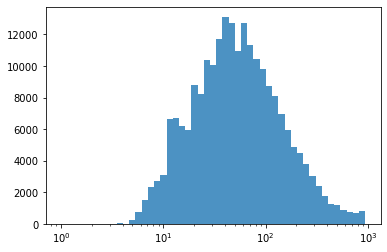

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(lengths,bins=bins,alpha=0.8)
plt.show()

In [31]:
input_ids[1]

[101,
 1040,
 1005,
 22091,
 2860,
 999,
 2002,
 3503,
 2023,
 4281,
 6120,
 1045,
 1005,
 1049,
 9428,
 5881,
 2007,
 1012,
 4283,
 1012,
 1006,
 2831,
 1007,
 1024,
 1010,
 2254,
 1010,
 1006,
 11396,
 1007,
 102]

In [32]:
labels = comments_train.toxic.to_numpy()

print(f"{np.sum(labels)}")

21384


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, '# of comments')

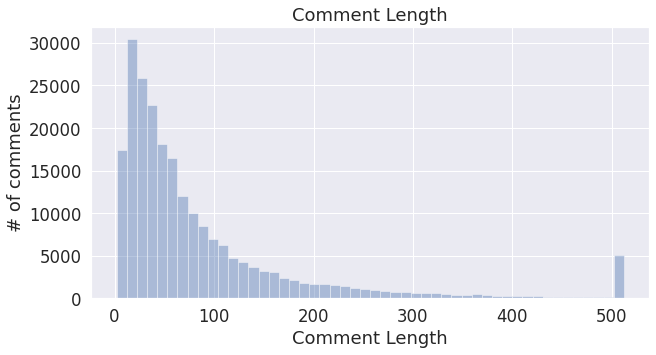

In [33]:
import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (10,5)

lengths = [min(l,512) for l in lengths]

sns.distplot(lengths, kde = False, rug = False)

plt.title('Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('# of comments')

In [34]:
num_truncated = lengths.count(512)

num_sentences = len(lengths)

prcnt = float(num_truncated) / float (num_sentences)

print(f'{num_truncated} of {num_sentences} sentences ({prcnt:.2%}) in the training set are longer than 512 tokens')

4902 of 223549 sentences (2.19%) in the training set are longer than 512 tokens


In [35]:
num_toxic = 0
num_non_toxic = 0

for i,l in enumerate(lengths):
  if l == 512:
    if labels[l]==1:
      num_toxic += 1
    else:
      num_non_toxic += 1
print(f'{num_toxic} of the truncated examples contains a personal atteck')


0 of the truncated examples contains a personal atteck


In [36]:
# padding and truncating

from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 128

print('\Padding/truncating all sentences to %d values...'% MAX_LEN)
print('\Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token,tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,dtype="long",
                          value=0,truncating="post",padding="post")

print("\nDone")

\Padding/truncating all sentences to 128 values...
\Padding token: "[PAD]", ID: 0


Using TensorFlow backend.



Done


In [37]:
len(input_ids[0])

128

In [0]:
# ATTENTION MASKS
attention_mask=[]

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]
  attention_mask.append(att_mask)


In [0]:
# FINAL DATA PREP

from sklearn.model_selection import train_test_split

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=2020, test_size=0.1)

train_masks, validation_masks ,_,_ = train_test_split(attention_mask, labels, random_state=2020, test_size=0.1)

In [0]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_inputs,train_masks,train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data,sampler = train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data,sampler = validation_sampler, batch_size=batch_size)

In [42]:
# BERT fine tuning
# train the classification model
# BertForSequenceClassification

from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
# Opimizer and Learning Rate Scheduler

optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                  )

In [0]:
from transformers import get_linear_schedule_with_warmup

epochs=4
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [0]:
# Training

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds,axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round((elapsed)))
  return str(datetime.timedelta(seconds=elapsed_rounded))
  

In [47]:
print(input_ids.shape)
print(len(attention_mask))

(223549, 128)
223549


In [48]:
# STARTING THE TRAINING

import random
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


loss_values=[]

for epoch_i in range(0,epochs):
  # ==============
  # Training
  # ==============

  print("")
  print(f'================EPOCH {epoch_i +1}/{epochs}=====================')
  print('Training. . . ')

  t0 = time.time()

  total_loss = 0
  model.train()

  for step, batch in enumerate(train_dataloader):
    if step % 100 ==0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print(f' Batch {step} of {len(train_dataloader)}. Elapsed: {elapsed}')

      b_input_ids = batch[0].to(device)
      b_input_mask = batch[1].to(device)
      b_labels = batch[2].to(device)

      model.zero_grad()

      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

      loss = output[0]

      total_loss += loss.item()

      loss.backward()

      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      optimizer.step()

      scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("")
  print(f"Average training loss: {avg_train_loss}")
  print(f"Training epoch took: {format_time(time.time() - t0)}")

  # ========================
  # validation
  # ========================


  print("")
  print("Running validation. . . ")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0,0
  nb_eval_steps, nb_eval_examples = 0,0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
      
    logits = outputs[0]

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    # print("==============================",logits.shape)
    # print(label_ids.shape)

    tmp_eval_accuracy = flat_accuracy(logits,label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1

  print(f" Accuracy: {eval_accuracy/nb_eval_steps}")
  print(f" Validation took: {format_time(time.time() - t0)}")

print("")
print("Training Completed")


================EPOCH 1/4=====================
Training. . . 
 Batch 100 of 6288. Elapsed: 0:00:00


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


 Batch 200 of 6288. Elapsed: 0:00:01
 Batch 300 of 6288. Elapsed: 0:00:02
 Batch 400 of 6288. Elapsed: 0:00:03
 Batch 500 of 6288. Elapsed: 0:00:03
 Batch 600 of 6288. Elapsed: 0:00:04
 Batch 700 of 6288. Elapsed: 0:00:05
 Batch 800 of 6288. Elapsed: 0:00:06
 Batch 900 of 6288. Elapsed: 0:00:06
 Batch 1000 of 6288. Elapsed: 0:00:07
 Batch 1100 of 6288. Elapsed: 0:00:08
 Batch 1200 of 6288. Elapsed: 0:00:09
 Batch 1300 of 6288. Elapsed: 0:00:09
 Batch 1400 of 6288. Elapsed: 0:00:10
 Batch 1500 of 6288. Elapsed: 0:00:11
 Batch 1600 of 6288. Elapsed: 0:00:11
 Batch 1700 of 6288. Elapsed: 0:00:12
 Batch 1800 of 6288. Elapsed: 0:00:13
 Batch 1900 of 6288. Elapsed: 0:00:14
 Batch 2000 of 6288. Elapsed: 0:00:14
 Batch 2100 of 6288. Elapsed: 0:00:15
 Batch 2200 of 6288. Elapsed: 0:00:16
 Batch 2300 of 6288. Elapsed: 0:00:17
 Batch 2400 of 6288. Elapsed: 0:00:17
 Batch 2500 of 6288. Elapsed: 0:00:18
 Batch 2600 of 6288. Elapsed: 0:00:19
 Batch 2700 of 6288. Elapsed: 0:00:20
 Batch 2800 of 6288.

In [49]:
for lv in loss_values:
  print(round(lv,5))

0.00258
0.00137
0.00132
0.00127


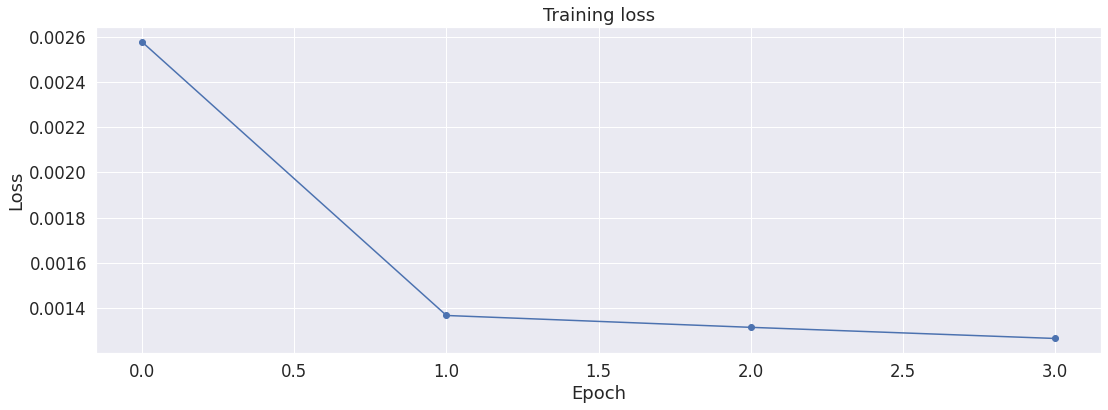

In [50]:
# plotting the training losses across the batches

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=(18,6)

plt.plot(loss_values,'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [51]:
import os

# saving best-practices: if you use defaults names for the model,you can reload it using from_pretrained()
output_dir = './model_save/'

# create output directory if needed
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using 'save_pretrained()'
model_to_save = model.module if hasattr(model, 'module') else model # takes care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir,'training_args.bin'))

Saving model to ./model_save/


('./model_save/vocab.txt',
 './model_save/special_tokens_map.json',
 './model_save/added_tokens.json')

In [0]:
gdrive_path = "./gdrive/My Drive/JIGSAW/NOTEBOOKS/"

# create output directory if needed
if not os.path.exists(gdrive_path):
  os.makedirs(gdrive_path)

# copy the model files to a directory in your Google drive
!cp -r ./model_save/ "./gdrive/My Drive/JIGSAW/NOTEBOOKS/"

In [0]:
# Performance on the TEST set

import pickle


In [0]:
infile = open('/content/gdrive/My Drive/JIGSAW/NOTEBOOKS/translated_comment_text.pkl','rb')
trans_test_set = pickle.load(infile)

In [55]:
len(trans_test_set)

63812

In [56]:
trans_test_set[0]

'As a 12th doctor, a wiki writer added his name to the wiki title Doctor Who. Personally, I fixed it. I would be glad if you approve. occipital'

In [57]:
comments_test.shape

(63812, 3)

In [58]:
trans_test=np.array(trans_test_set)
type(trans_test)

numpy.ndarray

In [59]:
len(trans_test)

63812

In [0]:
comments_test['translated_comment'] = trans_test

In [61]:
comments_test.head()

,id,content,lang,translated_comment
0,0,Doctor Who adlı viki başlığına . doctor olarak...,tr,"As a 12th doctor, a wiki writer added his name..."
1,1,"Вполне возможно, но я пока не вижу необходимос...",ru,"It is possible, but so far I do not see the ne..."
2,2,"Quindi tu sei uno di quelli conservativi , ...",it,"So you are one of the conservative ones, who p..."
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr,"Unfortunately, it did not happen, but there wa..."
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr,: Image: Source problem in Seldabagcan.jpg ima...


In [0]:
val_trans_list = open('/content/gdrive/My Drive/JIGSAW/NOTEBOOKS/translated_comment_validation.pkl','rb')
trans_validation_set = pickle.load(val_trans_list)
trans_val=np.array(trans_validation_set)

In [0]:
comments_validation['translated_comment'] = trans_val

In [64]:
comments_validation.tail(10)

,id,comment_text,lang,toxic,translated_comment
7990,7990,"Sei il primo che mi dice una cosa simile, e qu...",it,0,"You are the first to tell me such a thing, and..."
7991,7991,No has demostrado nada. Mientes de forma desca...,es,0,You haven't shown anything. You lie blatantly....
7992,7992,Hcagri isimli kullanıcı öğrenme süreci hakkınd...,tr,0,If you think or read a little bit about the us...
7993,7993,Öyle sanıyorum ki bahsettiğiniz Şəmsi Bədəlbəy...,tr,0,I think it is possible to change the Şşsi Bədə...
7994,7994,Hola Santiago! Te he contestado en tu página d...,es,0,Hello Santiago! I have answered you on your us...
7995,7995,Il fatto è che la pagina dei personaggi minori...,it,0,"The fact is, we understand the page of the min..."
7996,7996,El imbesil ete dela luna no se entera ni ostia...,es,1,The imbesil ete of the moon does not know or o...
7997,7997,olum sız manyakmısınz siz adam sıze sanal yıld...,tr,1,"dear, you are crazy, you don't know if the man..."
7998,7998,El mapa del reinado de Alhaken esta ligerament...,es,0,The map of the reign of Alhaken is slightly ex...
7999,7999,lasciami la tua email per favore. ad ogni modo...,it,0,"leave me your email please. in any case, if yo..."


In [65]:
# DATA PREPARATION

val_input_ids=[]

for sen in comments_validation.translated_comment:
  if ((len(input_ids) % 20000)==0):
    print(f'  Read {len(input_ids)} comments ')

  encoded_sent = tokenizer.encode(
      sen,
      add_special_tokens=True,
      max_length=MAX_LEN,
  )

  val_input_ids.append(encoded_sent)

print('DONE  ')
print('')
print(f'{len(val_input_ids)} test comments')


val_labels = comments_validation.toxic.to_numpy().astype(int)

print(f'{np.sum(val_labels):>10} positive (contains toxic)')
print(f'{len(val_labels) - np.sum(val_labels) :>10} negative(not a toxic)')

val_input_ids = pad_sequences(val_input_ids, maxlen=MAX_LEN,
                              dtype = "long", truncating = "post", padding="post")

val_attention_masks = []

for seq in val_input_ids:
  seq_mask = [float(i>10) for i in seq]
  val_attention_masks.append(seq_mask)

# convert to tensors
val_inputs = torch.tensor(val_input_ids)
val_masks = torch.tensor(val_attention_masks)
val_labels = torch.tensor(val_labels)

batch_size=32

val_data = TensorDataset(val_inputs,val_masks,val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

DONE  

8000 test comments
      1230 positive (contains toxic)
      6770 negative(not a toxic)


In [66]:
len(val_data)

8000

In [67]:
# Evaluate on Test Set

# prediction on the validation datset

print(f"Predicting labels for {len(val_inputs)} test sentences . . ")

# put model to eval mode
model.eval()

# tracking variables
predictions, true_labels = [],[]

t0 = time.time()

for (step,batch) in enumerate(val_dataloader):
  # add batch to gpu
  batch = tuple(t.to(device) for t in batch)

  if step % 100 == 0 and not step==0:
    elapsed = format_time(time.time() - t0)

    print(f'Batch {step} of {len(val_dataloader)}. Elapsed: {elapsed}')

  b_input_ids, b_input_masks, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids, token_type_ids=None,
                    attention_mask=b_input_masks)
    
  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  predictions.append(logits)
  true_labels.append(label_ids)

print("DONE")

Predicting labels for 8000 test sentences . . 
Batch 100 of 250. Elapsed: 0:00:24
Batch 200 of 250. Elapsed: 0:00:48
DONE


In [0]:
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

In [69]:
print(len(true_labels))

8000


In [70]:
predictions[31:40]

array([[ 2.8118675 , -2.3166873 ],
       [ 2.6467817 , -2.2446005 ],
       [ 1.3709838 , -1.3331759 ],
       [ 2.5785227 , -2.582155  ],
       [ 1.4826448 , -1.3680551 ],
       [ 2.6635048 , -2.214215  ],
       [ 2.872961  , -2.4588926 ],
       [ 2.7395267 , -2.5703833 ],
       [ 0.81598425, -0.8429213 ]], dtype=float32)

In [71]:
true_labels[51:60]

array([0, 0, 0, 0, 0, 0, 1, 0, 1])

In [0]:
probability_of_zero = predictions[:,0]
# probability_of_one = predictions[:,1]
prob_df = pd.DataFrame(probability_of_zero)
prob_df['1']=predictions[:,1]
# prob_df['probability_of_zero']=probability_of_zero
# prob_df['probability_of_one']=probability_of_one

In [73]:
print (prob_df.head(10))

          0         1
0  1.520525 -1.360748
1  2.628875 -2.635290
2 -0.384793  0.354153
3  2.968894 -2.820155
4  2.621154 -2.524712
5  2.381640 -2.038276
6  2.824130 -2.411361
7  2.857365 -2.586468
8  2.373379 -1.935815
9  2.431537 -2.061003


In [0]:
prob_df['predict_zero'] = np.where(prob_df[0]>=0.70, 0, 1)
prob_df['predict_one'] = np.where(prob_df['1']>= -2.0, 1, 0)
prob_df['sum'] = prob_df[0] + prob_df['1']
prob_df['true_labels'] = true_labels

In [75]:
true_labels[81:90]

array([0, 0, 1, 0, 1, 0, 0, 0, 0])

In [2]:
prob_df[11:20]

NameError: ignored

In [77]:
from sklearn.metrics import roc_auc_score

# use the model output for label 1 as our predictions.
p1 = predictions[:,1]

# calculate the ROC AUC
auc = roc_auc_score(true_labels,p1)

print('Test ROC AUC: %.3f' %auc)

Test ROC AUC: 0.905


In [78]:
import os

# saving best-practices: if you use defaults names for the model,you can reload it using from_pretrained()
output_dir = './model_save_bert1/'

# create output directory if needed
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using 'save_pretrained()'
model_to_save = model.module if hasattr(model, 'module') else model # takes care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir,'training_args.bin'))

Saving model to ./model_save_bert1/


('./model_save_bert1/vocab.txt',
 './model_save_bert1/special_tokens_map.json',
 './model_save_bert1/added_tokens.json')

In [0]:
gdrive_path = "./gdrive/My Drive/JIGSAW/NOTEBOOKS/"

# create output directory if needed
if not os.path.exists(gdrive_path):
  os.makedirs(gdrive_path)

# copy the model files to a directory in your Google drive
!cp -r ./model_save_bert1/ "./gdrive/My Drive/JIGSAW/NOTEBOOKS/"

In [1]:
model.predict("Is this something I'll be able to install on my site? When will you be releasing it?")

NameError: ignored